# Computing lag plots 

In this notebook we show how we can use Pandas to compute lag plots and how we can interpret them on some examples.

We will work with a monthly retail sales dataset (found [here](https://raw.githubusercontent.com/facebook/prophet/master/examples/example_retail_sales.csv)).

For instructions on how to download, prepare, and store the dataset, refer to notebook number 1, in the folder "01-Datasets" from this repo.

## Data Set Synopsis

The timeseries is collected between January 1992 and May 2016.

It consists of a single series of monthly values representing sales volumes. 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_context("talk")

# Lag plots

A lag plot is simply a scatter plot where we plot $y_t$ against a lagged version of itself $y_{t-k}$. A helpful function in Pandas, `pd.plotting.lag_plot`, allows us to do this from a given series. However, this method plots $y_{t+k}$ against $y_t$ which gives the same result.

## White noise

In [2]:
num_timesteps = 300  # Length of time series we want
np.random.seed(0)  # Ensures we generate the same random numbers every time

y = np.random.normal(loc=0, scale=1, size=num_timesteps)
ts = pd.date_range(start="2000-01-01", periods=num_timesteps, freq="D")

df = pd.DataFrame(data={"y": y}, index=ts)
df.head()

,y
2000-01-01,1.764052
2000-01-02,0.400157
2000-01-03,0.978738
2000-01-04,2.240893
2000-01-05,1.867558


Text(0.5, 1.0, 'white noise')

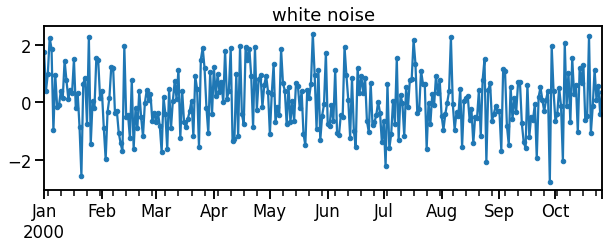

In [3]:
# Plot the time series
ax = df.plot(figsize=[10, 3], legend=None, marker=".")
ax.set_title("white noise")

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

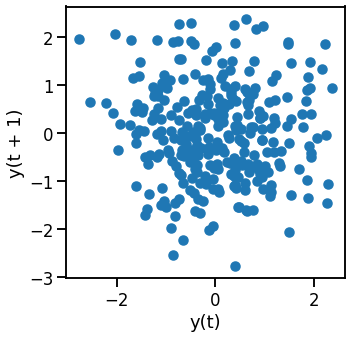

In [4]:
fig, ax = plt.subplots(figsize=[5, 5])
pd.plotting.lag_plot(df["y"], lag=1, ax=ax)

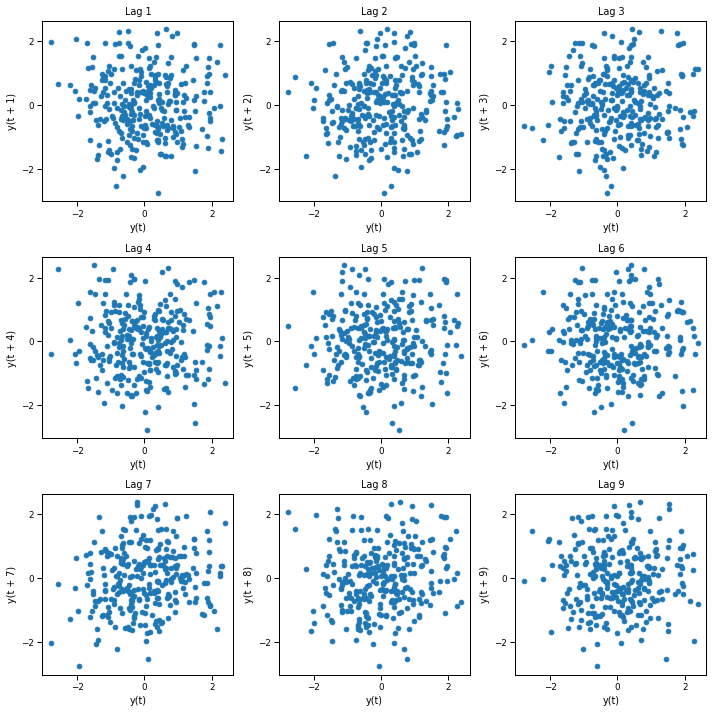

In [5]:
with sns.plotting_context("paper"):
    fig, ax = plt.subplots(nrows=3, ncols=3, figsize=[10, 10])
    for i, ax_ in enumerate(ax.flatten()):
        pd.plotting.lag_plot(df["y"], lag=i + 1, ax=ax_)
        ax_.set_title(f"Lag {i+1}")
        ax_.ticklabel_format(style="sci", scilimits=(0, 0))
    plt.tight_layout()

## Trend and seasonality: Retail sales example

We plot the time series against itself at various different lags over a one year period using the `pd.plotting.lag_plot` method in Pandas.

In [6]:
# Load retail sales dataset with the artificially added outliers
df = pd.read_csv(
    "../Datasets/example_retail_sales.csv",
    parse_dates=["ds"],
    index_col=["ds"],
)

<AxesSubplot:xlabel='ds'>

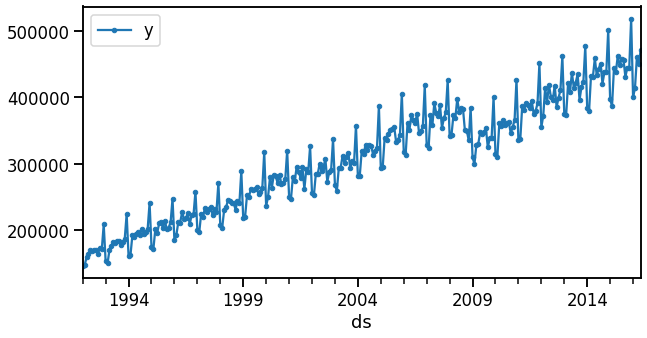

In [7]:
df.plot(y="y", marker=".", figsize=[10, 5])

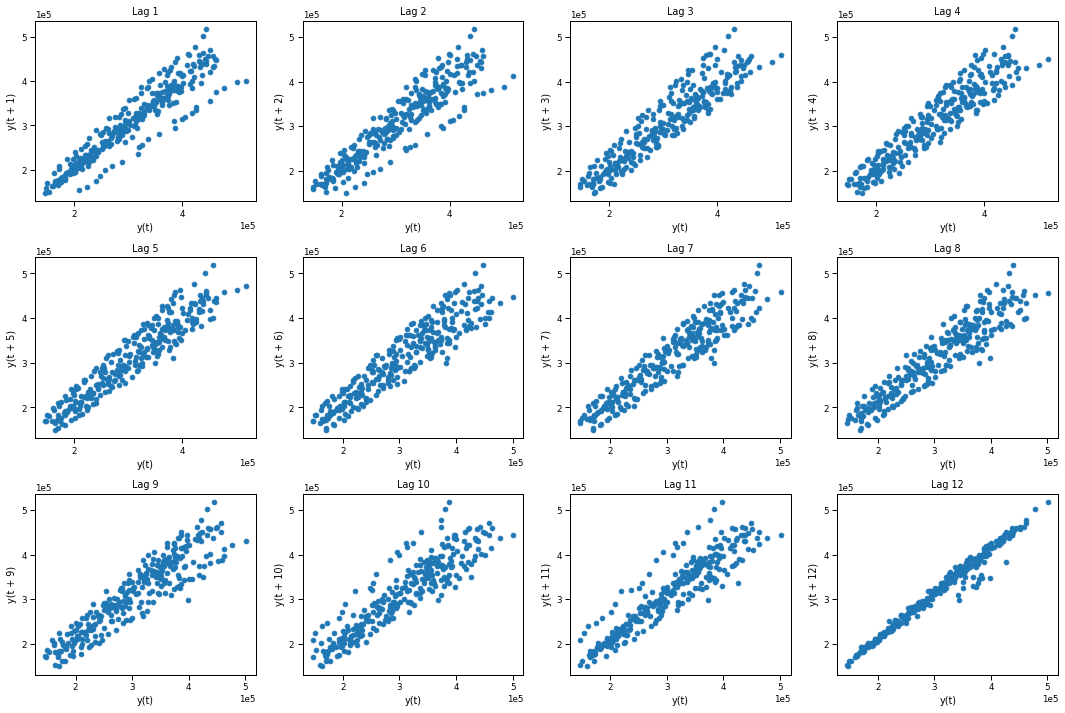

In [8]:
with sns.plotting_context("paper"):
    fig, ax = plt.subplots(nrows=3, ncols=4, figsize=[15, 10])
    for i, ax_ in enumerate(ax.flatten()):
        pd.plotting.lag_plot(df["y"], lag=i + 1, ax=ax_)
        ax_.set_title(f"Lag {i+1}")
        ax_.ticklabel_format(style="sci", scilimits=(0, 0))
    plt.tight_layout()

Due to the strong trend component in the time series we see that the sales is strongly correlated with itself at many different lags. The yearly seasonality is seen in the very strong correlation seen in the Lag 12 plot. As we would expect, this suggests a lag of 12 would be a useful feature.

<AxesSubplot:xlabel='ds'>

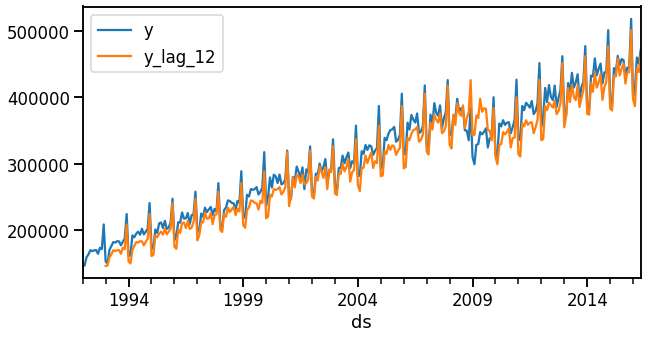

In [9]:
# Compute the lag
df["y_lag_12"] = df["y"].shift(periods=12)

# Plot the sales and the lag 100 sales
df.plot(y=["y", "y_lag_12"], figsize=[10, 5])

We expect the correlation to be greater with a shorter lag (more recent in time) than a larger lag (more distant in time). We check this below by comparing the lag plot for `lag=1` month and `lag=100` months.

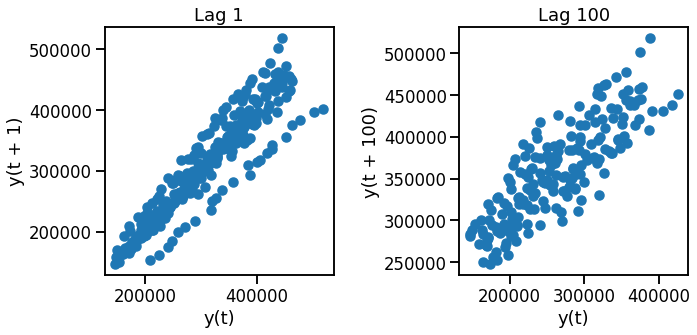

In [10]:
# Plot lag=1 vs lag=100
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[10, 5])
pd.plotting.lag_plot(df["y"], lag=1, ax=ax[0])
ax[0].set_title(f"Lag 1")
pd.plotting.lag_plot(df["y"], lag=100, ax=ax[1])
ax[1].set_title(f"Lag 100")

plt.tight_layout()

We can see that the scatter plot is more spread out for a lag of 100 compared to a lag of 1 as expected. But we still see a strong correlation. Why is this? It is due to the strong trend component. This can be more clearly understood by plotting the original timeseries and lagged timeseries together. 

<AxesSubplot:xlabel='ds'>

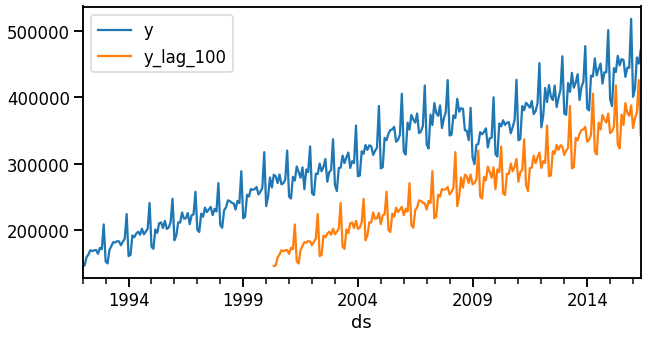

In [11]:
# Compute the lag
df["y_lag_100"] = df["y"].shift(periods=100)

# Plot the sales and the lag 100 sales
df.plot(y=["y", "y_lag_100"], figsize=[10, 5])

Visually it is clear that these two timeseries are highly correlated. When one has low magnitude so does the other, when one has a high magnitude so does the other. This is why even at large lags we see high autocorrelation in the presence of a strong trend. 

Just because the autocorrelation is high for large lags does not mean we should use large lags as features. By examining the autocorrelation and partial autocorrelation function in the next notebooks we shall see that a lower order lags will contribute the most information. Also using our own understanding of the domain we can rule out that the exact sales 100 months in the past should not have much of an effect on the sales in the present.